<a href="https://colab.research.google.com/github/CarolineJoi3375/RTA/blob/main/Appendix_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


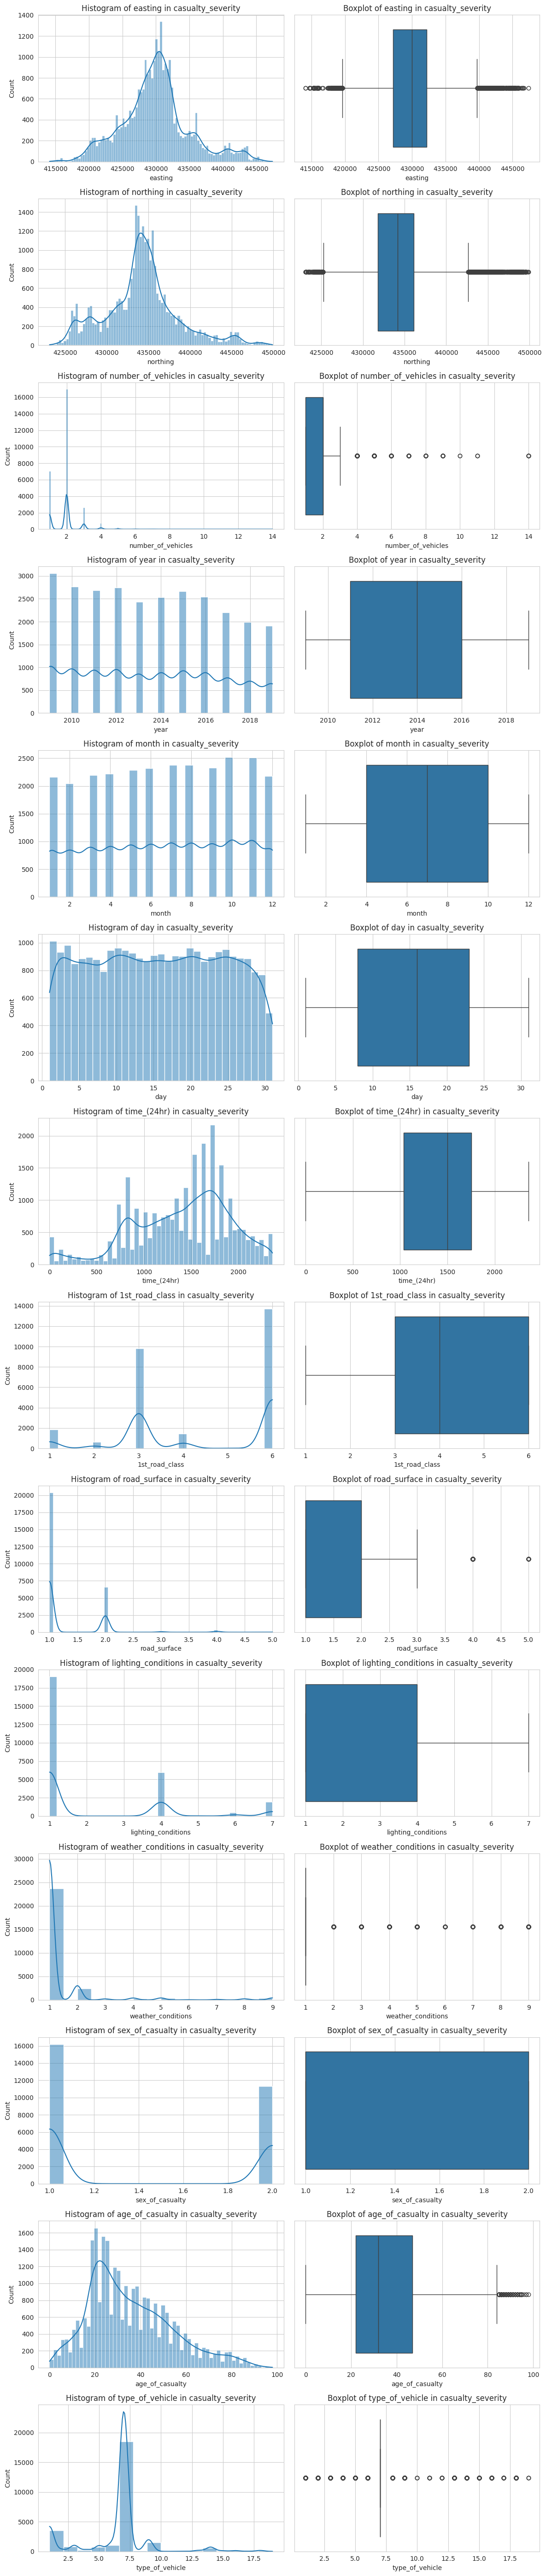

In [ ]:
#Histogram and Boxplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Defining a function to create histograms and boxplots for specified columns
def plot_histograms_boxplots(data, columns, dataset_name):
    fig, axes = plt.subplots(len(columns), 2, figsize=(12, 4 * len(columns)))
    for i, col in enumerate(columns):
        # Histogram
        sns.histplot(data[col], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram of {col} in {dataset_name}')
        # Boxplot
        sns.boxplot(x=data[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col} in {dataset_name}')
    plt.tight_layout()

# Columns of interest for both datasets
columns_of_interest = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']

# Plotting for casualty_severity dataset
plot_histograms_boxplots(df, columns_of_interest, 'casualty_severity')

In [ ]:
#D’Agostino’s K^2 Test
import pandas as pd
from scipy.stats import normaltest
data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')
data1=data['easting']
data2=data['northing']
data3=data['number_of_vehicles']
data4=data['year']
data5=data['month']
data6=data['day']
data7=data['time_(24hr)']
data8=data['age_of_casualty']

# normality test
stat1, p1 = normaltest(data1)
print('Statistics easting:',stat1)
print('p-value easting:',p1)
stat2, p2 = normaltest(data2)
print('Statistics northing:',stat2)
print('p-value northing:',p2)
stat3, p3 = normaltest(data3)
print('Statistics number_of_vehicles:',stat3)
print('p-value number_of_vehicles:',p3)
stat4, p4 = normaltest(data4)
print('Statistics year:',stat4)
print('p-value year:',p4)
stat5, p5 = normaltest(data5)
print('Statistics month:',stat5)
print('p-value month:',p5)
stat6, p6 = normaltest(data6)
print('Statistics day:',stat6)
print('p-value day:',p6)
stat7, p7 = normaltest(data7)
print('Statistics time_(24hr):',stat7)
print('p-value time_(24hr):',p7)
stat8, p8 = normaltest(data8)
print('Statistics age_of_casualty:',stat8)
print('p-value age_of_casualty:',p8)

# interpret
alpha = 0.05
if p1 > alpha:
 print('Feature 1 is a normal distribution (fail to reject H0)')
else:
 print('Feature 1 is NOT a normal distribution (reject H0)')

if p2 > alpha:
 print('Feature 2 is a normal distribution (fail to reject H0)')
else:
 print('Feature 2 is NOT a normal distribution (reject H0)')

if p3 > alpha:
 print('Feature 3 is a normal distribution (fail to reject H0)')
else:
 print('Feature 3 is NOT a normal distribution (reject H0)')

if p4 > alpha:
 print('Feature 4 is a normal distribution (fail to reject H0)')
else:
 print('Feature 4 is NOT a normal distribution (reject H0)')

if p5 > alpha:
 print('Feature 5 is a normal distribution (fail to reject H0)')
else:
 print('Feature 5 is NOT a normal distribution (reject H0)')

if p6 > alpha:
 print('Feature 6 is a normal distribution (fail to reject H0)')
else:
 print('Feature 6 is NOT a normal distribution (reject H0)')

if p7 > alpha:
 print('Feature 7 is a normal distribution (fail to reject H0)')
else:
 print('Feature 7 is NOT a normal distribution (reject H0)')

if p8 > alpha:
 print('Feature 8 is a normal distribution (fail to reject H0)')
else:
 print('Feature 8 is NOT a normal distribution (reject H0)')

Statistics easting: 843.2061774518455
p-value easting: 7.945203275369605e-184
Statistics northing: 1095.9527692321253
p-value northing: 1.0396327403628208e-238
Statistics number_of_vehicles: 17549.683309796143
p-value number_of_vehicles: 0.0
Statistics year: 18704.69533078773
p-value year: 0.0
Statistics month: 23269.915586740524
p-value month: 0.0
Statistics day: 22023.890513336522
p-value day: 0.0
Statistics time_(24hr): 1107.5389446177435
p-value time_(24hr): 3.169377203116166e-241
Statistics age_of_casualty: 1820.591788879271
p-value age_of_casualty: 0.0
Feature 1 is NOT a normal distribution (reject H0)
Feature 2 is NOT a normal distribution (reject H0)
Feature 3 is NOT a normal distribution (reject H0)
Feature 4 is NOT a normal distribution (reject H0)
Feature 5 is NOT a normal distribution (reject H0)
Feature 6 is NOT a normal distribution (reject H0)
Feature 7 is NOT a normal distribution (reject H0)
Feature 8 is NOT a normal distribution (reject H0)


In [ ]:
#Kruskal-Wallis H Test - Time
import pandas as pd
import scipy.stats as stats

data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

# Separate the data for each severity
fatal_data = data[data['casualty_severity'] == 1]['time_(24hr)']
serious_data = data[data['casualty_severity'] == 2]['time_(24hr)']
slight_data = data[data['casualty_severity'] == 3]['time_(24hr)']

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = stats.kruskal(fatal_data, serious_data, slight_data)

# Calculate the degrees of freedom
k = len(data['casualty_severity'].unique())
df = k - 1

print("H-statistic:", h_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", df)


H-statistic: 0.8649804976020482
p-value: 0.6488911805706187
Degrees of freedom: 2


In [ ]:
#Kruskal-Wallis H Test - Year
import pandas as pd
import scipy.stats as stats

data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

# Separate the data for each severity
fatal_data = data[data['casualty_severity'] == 1]['year']
serious_data = data[data['casualty_severity'] == 2]['year']
slight_data = data[data['casualty_severity'] == 3]['year']

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = stats.kruskal(fatal_data, serious_data, slight_data)

# Calculate the degrees of freedom
k = len(data['casualty_severity'].unique())
df = k - 1

print("H-statistic:", h_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", df)

H-statistic: 109.37510742736906
p-value: 1.7762217893657264e-24
Degrees of freedom: 2


In [ ]:
#Kruskal-Wallis H Test - Month
import pandas as pd
import scipy.stats as stats

data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

# Separate the data for each severity
fatal_data = data[data['casualty_severity'] == 1]['month']
serious_data = data[data['casualty_severity'] == 2]['month']
slight_data = data[data['casualty_severity'] == 3]['month']

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = stats.kruskal(fatal_data, serious_data, slight_data)

# Calculate the degrees of freedom
k = len(data['casualty_severity'].unique())
df = k - 1

print("H-statistic:", h_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", df)

H-statistic: 0.03446375721835215
p-value: 0.9829157410733356
Degrees of freedom: 2


In [ ]:
#Kruskal-Wallis H Test - Day
import pandas as pd
import scipy.stats as stats

data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

# Separate the data for each severity
fatal_data = data[data['casualty_severity'] == 1]['day']
serious_data = data[data['casualty_severity'] == 2]['day']
slight_data = data[data['casualty_severity'] == 3]['day']

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = stats.kruskal(fatal_data, serious_data, slight_data)

# Calculate the degrees of freedom
k = len(data['casualty_severity'].unique())
df = k - 1

print("H-statistic:", h_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", df)

H-statistic: 2.0566387421964794
p-value: 0.35760746125326864
Degrees of freedom: 2


In [ ]:
#Kruskal-Wallis H Test - Easting
import pandas as pd
import scipy.stats as stats

data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

# Separate the data for each severity
fatal_data = data[data['casualty_severity'] == 1]['easting']
serious_data = data[data['casualty_severity'] == 2]['easting']
slight_data = data[data['casualty_severity'] == 3]['easting']

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = stats.kruskal(fatal_data, serious_data, slight_data)

# Calculate the degrees of freedom
k = len(data['casualty_severity'].unique())
df = k - 1

print("H-statistic:", h_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", df)

H-statistic: 1.4067858025358635
p-value: 0.4949032939447868
Degrees of freedom: 2


In [ ]:
#Kruskal-Wallis H Test - Northing
import pandas as pd
import scipy.stats as stats

data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

# Separate the data for each severity
fatal_data = data[data['casualty_severity'] == 1]['northing']
serious_data = data[data['casualty_severity'] == 2]['northing']
slight_data = data[data['casualty_severity'] == 3]['northing']

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = stats.kruskal(fatal_data, serious_data, slight_data)

# Calculate the degrees of freedom
k = len(data['casualty_severity'].unique())
df = k - 1

print("H-statistic:", h_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", df)

H-statistic: 3.1760381770234436
p-value: 0.20432997068867537
Degrees of freedom: 2


In [ ]:
#Kruskal-Wallis H Test - Number of Vehicles
import pandas as pd
import scipy.stats as stats

data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

# Separate the data for each severity
fatal_data = data[data['casualty_severity'] == 1]['number_of_vehicles']
serious_data = data[data['casualty_severity'] == 2]['number_of_vehicles']
slight_data = data[data['casualty_severity'] == 3]['number_of_vehicles']

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = stats.kruskal(fatal_data, serious_data, slight_data)

# Calculate the degrees of freedom
k = len(data['casualty_severity'].unique())
df = k - 1

print("H-statistic:", h_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", df)

H-statistic: 555.4646628019832
p-value: 2.412020676772854e-121
Degrees of freedom: 2


In [ ]:
#Kruskal-Wallis H Test - Age
import pandas as pd
import scipy.stats as stats

data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

# Separate the data for each severity
fatal_data = data[data['casualty_severity'] == 1]['age_of_casualty']
serious_data = data[data['casualty_severity'] == 2]['age_of_casualty']
slight_data = data[data['casualty_severity'] == 3]['age_of_casualty']

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = stats.kruskal(fatal_data, serious_data, slight_data)

# Calculate the degrees of freedom
k = len(data['casualty_severity'].unique())
df = k - 1

print("H-statistic:", h_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", df)

H-statistic: 20.38178475957358
p-value: 3.751039813639206e-05
Degrees of freedom: 2


In [ ]:
#Chi Square Independence Test - 1st road class
import pandas as pd
import scipy.stats as stats

dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

df = pd.DataFrame(dataset, columns= ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle','casualty_severity'])

crosstab = pd.crosstab(df["1st_road_class"], df["casualty_severity"])
print(crosstab)
print("\n")

#The information is returned within a tuple where the first value is the  test static,
#the second value is the p-value,
#and the third number is the degrees of freedom.
#An array is also returned which contains the expected cell counts.

w, x, y, z = stats.chi2_contingency(crosstab)
print("The Chi Square value is:", w)
print("The pvalue is:", x)
print("The value for degree of freedom is :", y)
print("Expected cell counts is:", z)
print("\n")

# interpret p-value
alpha = 0.05
print("p value is " + str(x))
if x <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

casualty_severity   1     2      3
1st_road_class                    
1                  11   149   1702
2                   7    48    591
3                  99  1140   8575
4                  14   186   1258
5                   0     7     30
6                  77  1803  11839


The Chi Square value is: 78.24044803469265
The pvalue is: 1.109725798775012e-12
The value for degree of freedom is : 10
Expected cell counts is: [[1.40650784e+01 2.25379358e+02 1.62255556e+03]
 [4.87972109e+00 7.81928385e+01 5.62927440e+02]
 [7.41324811e+01 1.18790173e+03 8.55196579e+03]
 [1.10133643e+01 1.76478574e+02 1.27050806e+03]
 [2.79488669e-01 4.47853719e+00 3.22419741e+01]
 [1.03629866e+02 1.66056896e+03 1.19548012e+04]]


p value is 1.109725798775012e-12
Dependent (reject H0)


In [ ]:
#Chi Square Independence Test - road surface
import pandas as pd
import scipy.stats as stats

dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

df = pd.DataFrame(dataset, columns= ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle','casualty_severity'])

crosstab = pd.crosstab(df["road_surface"], df["casualty_severity"])
print(crosstab)
print("\n")

#The information is returned within a tuple where the first value is the  test static,
#the second value is the p-value,
#and the third number is the degrees of freedom.
#An array is also returned which contains the expected cell counts.

w, x, y, z = stats.chi2_contingency(crosstab)
print("The Chi Square value is:", w)
print("The pvalue is:", x)
print("The value for degree of freedom is :", y)
print("Expected cell counts is:", z)
print("\n")

# interpret p-value
alpha = 0.05
print("p value is " + str(x))
if x <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

casualty_severity    1     2      3
road_surface                       
1                  126  2476  17780
2                   81   801   5712
3                    0    14    174
4                    1    40    302
5                    0     2     27


The Chi Square value is: 32.34692916395002
The pvalue is: 8.07125619004471e-05
The value for degree of freedom is : 8
Expected cell counts is: [[1.53960488e+02 2.46706878e+03 1.77609707e+04]
 [4.98094131e+01 7.98147952e+02 5.74604264e+03]
 [1.42010459e+00 2.27558106e+01 1.63824085e+02]
 [2.59093550e+00 4.15172501e+01 2.98891814e+02]
 [2.19058687e-01 3.51020482e+00 2.52707365e+01]]


p value is 8.07125619004471e-05
Dependent (reject H0)


In [ ]:
#Chi Square Independence Test - Lighting condition
import pandas as pd
import scipy.stats as stats

dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

df = pd.DataFrame(dataset, columns= ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle','casualty_severity'])

crosstab = pd.crosstab(df["lighting_conditions"], df["casualty_severity"])
print(crosstab)
print("\n")

#The information is returned within a tuple where the first value is the  test static,
#the second value is the p-value,
#and the third number is the degrees of freedom.
#An array is also returned which contains the expected cell counts.

w, x, y, z = stats.chi2_contingency(crosstab)
print("The Chi Square value is:", w)
print("The pvalue is:", x)
print("The value for degree of freedom is :", y)
print("Expected cell counts is:", z)
print("\n")

# interpret p-value
alpha = 0.05
print("p value is " + str(x))
if x <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

casualty_severity      1     2      3
lighting_conditions                  
1                    114  2184  16761
4                     69   830   5066
5                      1    15     55
6                     14    85    425
7                     10   219   1688


The Chi Square value is: 89.66206464031275
The pvalue is: 5.446111879827601e-16
The value for degree of freedom is : 8
Expected cell counts is: [[1.43966880e+02 2.30693082e+03 1.66081023e+04]
 [4.50581058e+01 7.22012820e+02 5.19792907e+03]
 [5.36316095e-01 8.59394974e+00 6.18697342e+01]
 [3.95816386e+00 6.34257699e+01 4.56616066e+02]
 [1.44805346e+01 2.32036643e+02 1.67048282e+03]]


p value is 5.446111879827601e-16
Dependent (reject H0)


In [ ]:
#Chi Square Independence Test - Weather condition
import pandas as pd
import scipy.stats as stats

dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

df = pd.DataFrame(dataset, columns= ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle','casualty_severity'])

crosstab = pd.crosstab(df["weather_conditions"], df["casualty_severity"])
print(crosstab)
print("\n")

#The information is returned within a tuple where the first value is the  test static,
#the second value is the p-value,
#and the third number is the degrees of freedom.
#An array is also returned which contains the expected cell counts.

w, x, y, z = stats.chi2_contingency(crosstab)
print("The Chi Square value is:", w)
print("The pvalue is:", x)
print("The value for degree of freedom is :", y)
print("Expected cell counts is:", z)
print("\n")

# interpret p-value
alpha = 0.05
print("p value is " + str(x))
if x <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

casualty_severity     1     2      3
weather_conditions                  
1                   171  2930  20591
2                    21   266   2123
3                     0    14    152
4                     6    27    286
5                     6    40    282
6                     0     1     27
7                     2     8     70
8                     2    21    156
9                     0    26    308


The Chi Square value is: 37.08466329688497
The pvalue is: 0.0020402802900148535
The value for degree of freedom is : 16
Expected cell counts is: [[1.78963393e+02 2.86771630e+03 2.06453203e+04]
 [1.82045322e+01 2.91710125e+02 2.10008534e+03]
 [1.25392214e+00 2.00928966e+01 1.44653181e+02]
 [2.40964555e+00 3.86122531e+01 2.77978101e+02]
 [2.47762929e+00 3.97016270e+01 2.85820744e+02]
 [2.11504939e-01 3.38916328e+00 2.43993318e+01]
 [6.04299826e-01 9.68332365e+00 6.97123765e+01]
 [1.35212086e+00 2.16664367e+01 1.55981442e+02]
 [2.52295177e+00 4.04278762e+01 2.91049172e+02]]


p value is 

In [ ]:
#Chi Square Independence Test - Sex of Casualty
import pandas as pd
import scipy.stats as stats

dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

df = pd.DataFrame(dataset, columns= ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle','casualty_severity'])

crosstab = pd.crosstab(df["sex_of_casualty"], df["casualty_severity"])
print(crosstab)
print("\n")

#The information is returned within a tuple where the first value is the  test static,
#the second value is the p-value,
#and the third number is the degrees of freedom.
#An array is also returned which contains the expected cell counts.

w, x, y, z = stats.chi2_contingency(crosstab)
print("The Chi Square value is:", w)
print("The pvalue is:", x)
print("The value for degree of freedom is :", y)
print("Expected cell counts is:", z)
print("\n")

# interpret p-value
alpha = 0.05
print("p value is " + str(x))
if x <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

casualty_severity    1     2      3
sex_of_casualty                    
1                  153  2330  13722
2                   55  1003  10273


The Chi Square value is: 214.24986363277014
The pvalue is: 2.9938720641363595e-47
The value for degree of freedom is : 2
Expected cell counts is: [[  122.40848344  1961.47824666 14121.1132699 ]
 [   85.59151656  1371.52175334  9873.8867301 ]]


p value is 2.9938720641363595e-47
Dependent (reject H0)


In [ ]:
#Chi Square Independence Test - Type of Vehicle
import pandas as pd
import scipy.stats as stats

dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

df = pd.DataFrame(dataset, columns= ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle','casualty_severity'])

crosstab = pd.crosstab(df["type_of_vehicle"], df["casualty_severity"])
print(crosstab)
print("\n")

#The information is returned within a tuple where the first value is the  test static,
#the second value is the p-value,
#and the third number is the degrees of freedom.
#An array is also returned which contains the expected cell counts.

w, x, y, z = stats.chi2_contingency(crosstab)
print("The Chi Square value is:", w)
print("The pvalue is:", x)
print("The value for degree of freedom is :", y)
print("Expected cell counts is:", z)
print("\n")

# interpret p-value
alpha = 0.05
print("p value is " + str(x))
if x <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

casualty_severity    1     2      3
type_of_vehicle                    
1                   11   570   2712
2                    2    58    181
3                   11   259    529
4                    5    94    136
5                   19   291    443
6                    3    84    937
7                  125  1708  16663
8                    0    12     88
9                    6   117   1426
10                   0     1      2
11                   0     1      6
12                   0     1      8
13                   2    16    114
14                   7    56    506
15                   2    11     64
16                  12    18     72
17                   0     7     15
18                   3    27     92
19                   0     2      1


The Chi Square value is: 1569.5212388830262
The pvalue is: 7.108142836032587e-307
The value for degree of freedom is : 36
Expected cell counts is: [[2.48744916e+01 3.98589810e+02 2.86953570e+03]
 [1.82045322e+00 2.91710125e+01 2.10008534e+02]